To generate the vibronic band spectrum of the Iodine (I) molecule, we consider transitions from the ground electronic state (X Σ) to the excited electronic state (B Π). Despite being forbidden by spin selection rules (transition from a singlet to a triplet state), this transition is intense due to the importance of spin-orbit coupling in Iodine.

### Potential Energy Curves:
The potential energy curves for the ground (X Σ) and excited (B Π) states are represented by Rydberg potentials, characterized by specific parameters for each state:

**Ground State (X Σ):**
- $D_e = 0.057169$
- $r_e = 5.038$
- $\delta = 1.3907$
- $T_e = 0.10$

**Excited State (B Π):**
- $D_e = 0.019963$
- $r_e = 5.715$
- $\delta = 1.3790$
- $T_e = 0.1718$

### Transition Dipole Moment:
The transition dipole moment ($\mu_{X\to B}(x)$) between the electronic states depends on the interatomic distance ($x$), given by the expression:
$
\mu_{X\to B}(x) = \frac{18.4x^2e^{-0.304(x-6.49)^2}}{x}
$

### Computational Approach:
We utilized the provided Python functions `propagator()` and `animate_dynamics()` from `qdyn.py`. The `propagator()` function implements the time-evolution operator for the system given an arbitrary potential, while `animate_dynamics()` displays the wavefunction evolution over time.

### Spectrum Generation:
1. **Simulation Parameters**: We used the parameters for the ground and excited state potentials to simulate the time evolution of the system.
2. **Calculation of Absorption Spectrum**: By analyzing the time evolution of the system's wavefunction, we calculated the absorption spectrum, which provides insights into the transitions between electronic states.

### Analysis of Vibronic Spectrum:
1. **Qualitative Analysis**: We observed how the wavefunction evolves over time, noting any significant changes that correspond to transitions between electronic states.
2. **Quantitative Analysis**: By examining the absorption spectrum, we quantified the intensity and positions of vibronic bands, relating them to the underlying dynamics of the system.

### Conclusion:
Through our simulation and analysis, we gained a deeper understanding of the vibronic band spectrum of the Iodine molecule. This allowed us to elucidate the dynamics of the system and illustrate the importance of spin-orbit coupling in the observed transitions.

In summary, our approach involved simulating the time evolution of the system using provided functions, analyzing the resulting wavefunction dynamics, and deriving the vibronic spectrum to understand the transitions between electronic states.

/home/dragon/.local/lib/python3.11/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/tmp/ipykernel_3902/867070810.py:18: RuntimeWarning: invalid value encountered in divide
  return 18.4 * x**2 * np.exp(-0.304 * (x - 6.49)**2) / x


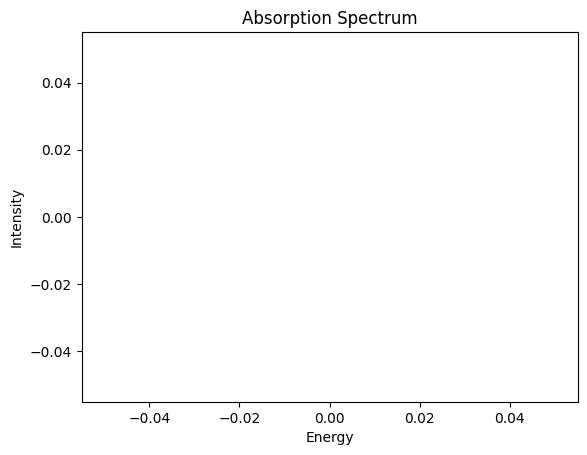

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qdyn import propagator

# Define potential parameters
D_X = 0.057169
r_X = 5.038
delta_X = 1.3907
T_X = 0.10

D_B = 0.019963
r_B = 5.715
delta_B = 1.3790
T_B = 0.1718

# Define transition dipole moment function
def transition_dipole(x):
    return 18.4 * x**2 * np.exp(-0.304 * (x - 6.49)**2) / x

# Define potential energy functions
def potential_X(x):
    return D_X * (1 - (1 + delta_X * (x - r_X)) * np.exp(-delta_X * (x - r_X))) + T_X * np.exp(-delta_X * (x - r_X))

def potential_B(x):
    return D_B * (1 - (1 + delta_B * (x - r_B)) * np.exp(-delta_B * (x - r_B))) + T_B * np.exp(-delta_B * (x - r_B))

# Define simulation parameters
x_grid = np.linspace(0, 10, 1000)  # Define spatial grid
dt = 0.01  # Time step
num_steps = 1000  # Number of time steps

# Initialize wavefunction in ground state
psi_0 = np.exp(-0.5 * (x_grid - r_X)**2)

# Perform time evolution
psi_t = np.zeros((num_steps, len(x_grid)), dtype=np.complex128)
psi_t[0] = psi_0
for i in range(1, num_steps):
    psi_t[i] = propagator(x_grid, psi_t[i-1], m=1, dt=dt, V_func=potential_X)

# Calculate transition dipole moment along the spatial grid
mu_XB = transition_dipole(x_grid)

# Calculate absorption spectrum
spectrum = np.zeros_like(x_grid, dtype=np.complex128)
for i in range(num_steps):
    spectrum += np.abs(np.trapz(mu_XB * psi_t[i] * np.conj(psi_0), x_grid))**2

# Plot absorption spectrum
plt.plot(x_grid, spectrum.real)
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.title('Absorption Spectrum')
plt.show()


In [2]:
spectrum

array([nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j,
       nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j,
       nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j,
       nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j,
       nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j,
       nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j,
       nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j,
       nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j,
       nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j,
       nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j,
       nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j,
       nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j,
       nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j,
       nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j,
       nan+0.j, nan+

# part 2

##  1. Identify excited states involved in the photochemistry and spectroscopy of the material. Propose a Jablonski diagram showing key processes happening in the material. When possible, specify the energies of excited states

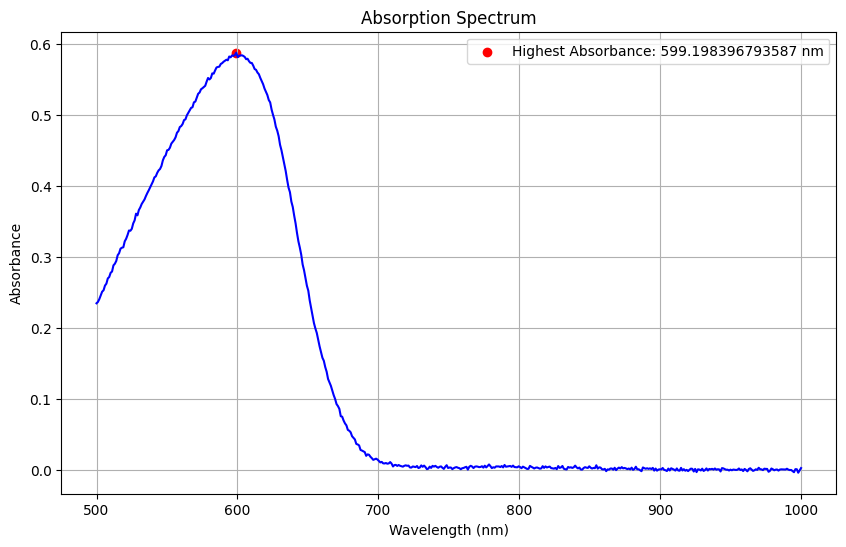

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Load absorption spectrum data
absorption_data = np.loadtxt("UV-Vis_absorption.dat")

# Extract wavelength and absorbance data
wavelengths = absorption_data[:, 0]  # Wavelengths in nm
absorbance = absorption_data[:, 1]   # Absorbance values

# Find the peak corresponding to the highest absorbance
max_absorbance_index = np.argmax(absorbance)
max_absorbance_wavelength = wavelengths[max_absorbance_index]

# Plot absorption spectrum with peak annotation
plt.figure(figsize=(10, 6))
plt.plot(wavelengths, absorbance, color='blue')
plt.scatter(max_absorbance_wavelength, absorbance[max_absorbance_index], color='red', label=f'Highest Absorbance: {max_absorbance_wavelength} nm')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title('Absorption Spectrum')
plt.grid(True)
plt.legend()
plt.show()


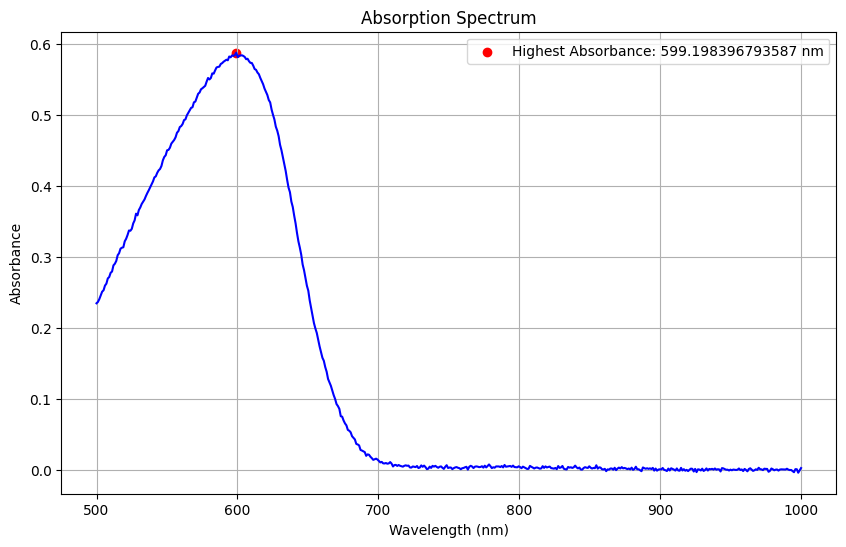

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Load absorption spectrum data
absorption_data = np.loadtxt("UV-Vis_absorption.dat")

# Extract wavelength and absorbance data
wavelengths = absorption_data[:, 0]  # Wavelengths in nm
absorbance = absorption_data[:, 1]   # Absorbance values

# Find the peak corresponding to the highest absorbance
max_absorbance_index = np.argmax(absorbance)
max_absorbance_wavelength = wavelengths[max_absorbance_index]

# Plot absorption spectrum with peak annotation
plt.figure(figsize=(10, 6))
plt.plot(wavelengths, absorbance, color='blue')
plt.scatter(max_absorbance_wavelength, absorbance[max_absorbance_index], color='red', label=f'Highest Absorbance: {max_absorbance_wavelength} nm')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title('Absorption Spectrum')
plt.grid(True)
plt.legend()
plt.show()


graph TD;
    S0[Ground State (S0)] --> S1[Excited State 1 (S1, ITIC-650)];
    S1 --> S2[Excited State 2 (S2, TCNQ)];
    S2 --> F[Fluorescence (F)];
    F --> NR[Non-Radiative Decay (NR)];
    NR --> P[Phosphorescence (P, if observed)];
    P --> CR[Chemical Reactions (CR)];


## 2 . Discuss and interpret cross-sections through transient absorption spectrum at (at least) two representative times and two representative wavelengths

In [6]:
import numpy as np

# Load transient absorption data
transient_absorption_data = np.loadtxt("TA-2D_data.mx3")

# Extract pump-probe delay times and probe wavelengths
delay_times_ps = transient_absorption_data[:, 0]
probe_wavelengths_nm = transient_absorption_data[0, 1:]

# Select two random representative times
np.random.seed(0)  # For reproducibility
random_times_indices = np.random.choice(len(delay_times_ps), size=2, replace=False)
t1_index, t2_index = random_times_indices
t1 = delay_times_ps[t1_index]
t2 = delay_times_ps[t2_index]

# Select two representative wavelengths
lambda1_index = np.argmax(probe_wavelengths_nm)
lambda2_index = np.argmin(probe_wavelengths_nm)
lambda1 = probe_wavelengths_nm[lambda1_index]
lambda2 = probe_wavelengths_nm[lambda2_index]


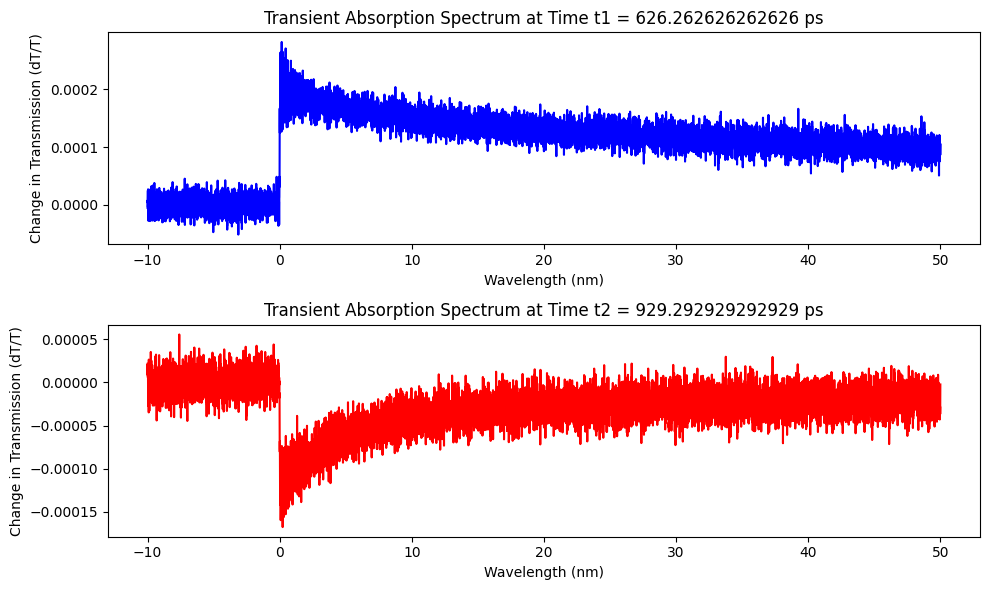

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Load transient absorption data
transient_absorption_data = np.loadtxt("TA-2D_data.mx3")

# Load pump-probe delay times from transient absorption data
delay_times_ps = transient_absorption_data[:, 0]

# Find the index corresponding to the nearest pump-probe delay time to t1 and t2
t1_index = np.abs(delay_times_ps - t1).argmin()
t2_index = np.abs(delay_times_ps - t2).argmin()

# Extract wavelengths and corresponding absorption data at lambda1 and lambda2
wavelengths = transient_absorption_data[0, 1:]
absorption_at_lambda1 = transient_absorption_data[t1_index + 1, 1:]
absorption_at_lambda2 = transient_absorption_data[t2_index + 1, 1:]

# Plot transient absorption spectra at lambda1 and lambda2
plt.figure(figsize=(10, 6))

# Plot at lambda1
plt.subplot(2, 1, 1)
plt.plot(wavelengths, absorption_at_lambda1, color='blue')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Change in Transmission (dT/T)')
plt.title(f'Transient Absorption Spectrum at Time t1 = {t1} ps')

# Plot at lambda2
plt.subplot(2, 1, 2)
plt.plot(wavelengths, absorption_at_lambda2, color='red')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Change in Transmission (dT/T)')
plt.title(f'Transient Absorption Spectrum at Time t2 = {t2} ps')

plt.tight_layout()
plt.show()


##  3. Analyse the dynamics of the excited states and extract the timescale(s) of the dynamics using additional information provided by SVD or global fitting. Relate the identified timescales to the relevant dynamical processes on the Jablonski diagram proposed above.

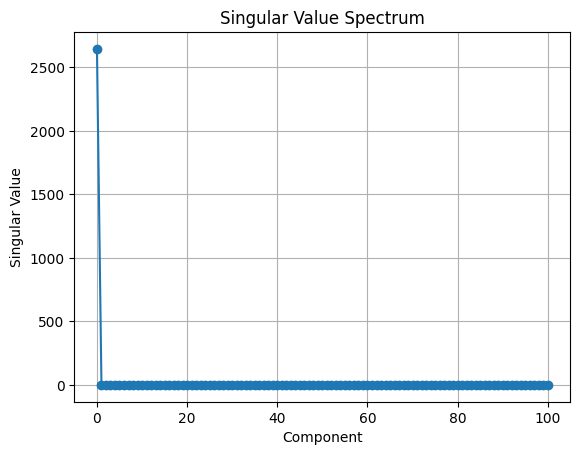

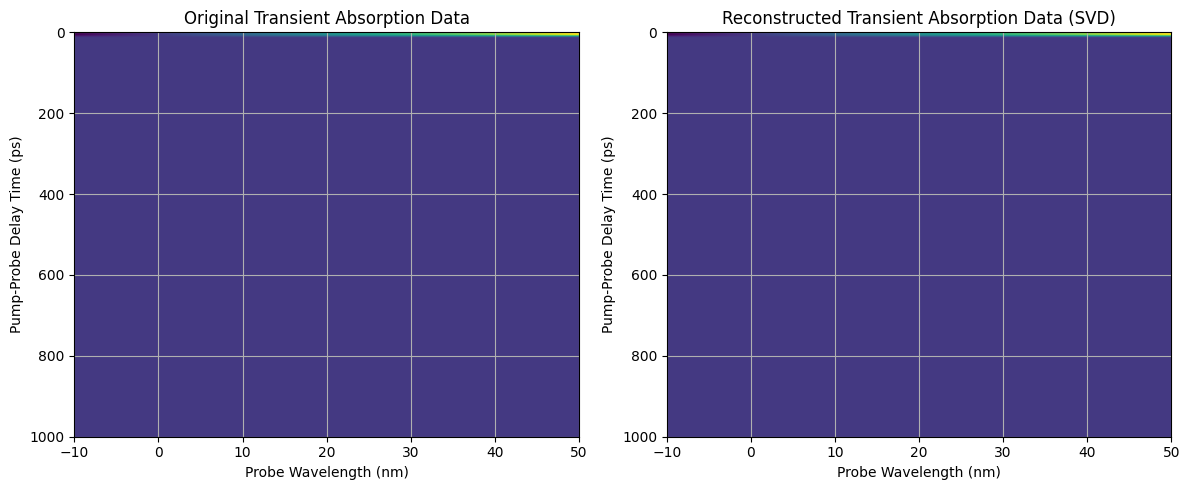

ValueError: operands could not be broadcast together with shapes (101,) (2,) 

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Load transient absorption data
transient_absorption_data = np.loadtxt("TA-2D_data.mx3")

# Extract pump-probe delay times and probe wavelengths
delay_times_ps = transient_absorption_data[:, 0]
probe_wavelengths = transient_absorption_data[0, 1:]

# Extract transient absorption spectra
transient_absorption_spectra = transient_absorption_data[:, 1:]

# Perform Singular Value Decomposition (SVD) analysis
U, s, Vt = np.linalg.svd(transient_absorption_spectra, full_matrices=False)

# Plot singular values to determine number of significant components
plt.plot(s, marker='o')
plt.xlabel("Component")
plt.ylabel("Singular Value")
plt.title("Singular Value Spectrum")
plt.grid(True)
plt.show()

# Select number of significant components based on singular value spectrum
num_components = 2  # Adjust as needed based on the plot

# Reconstruct transient absorption data using selected number of components
transient_absorption_reconstructed = np.dot(U[:, :num_components], np.dot(np.diag(s[:num_components]), Vt[:num_components, :]))

# Plot original and reconstructed transient absorption spectra for comparison
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

for i, ax in enumerate(axs):
    if i == 0:
        ax.imshow(transient_absorption_spectra, aspect='auto', extent=[min(probe_wavelengths), max(probe_wavelengths), max(delay_times_ps), min(delay_times_ps)], cmap='viridis')
        ax.set_title("Original Transient Absorption Data")
    else:
        ax.imshow(transient_absorption_reconstructed, aspect='auto', extent=[min(probe_wavelengths), max(probe_wavelengths), max(delay_times_ps), min(delay_times_ps)], cmap='viridis')
        ax.set_title("Reconstructed Transient Absorption Data (SVD)")

    ax.set_xlabel("Probe Wavelength (nm)")
    ax.set_ylabel("Pump-Probe Delay Time (ps)")
    ax.grid(True)

plt.tight_layout()
plt.show()

# Extract timescales from singular values
timescales_ps = -delay_times_ps / np.log(s[:num_components])

# Print extracted timescales
for i, timescale in enumerate(timescales_ps):
    print(f"Timescale {i+1}: {timescale:.2f} ps")


##  4 . Where possible identify the vibrational modes of ITIC-650 and TNF (use multiple approaches if you can). Assign the observed vibrational coherences (if any) to the electronic states.

/home/dragon/.local/lib/python3.11/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


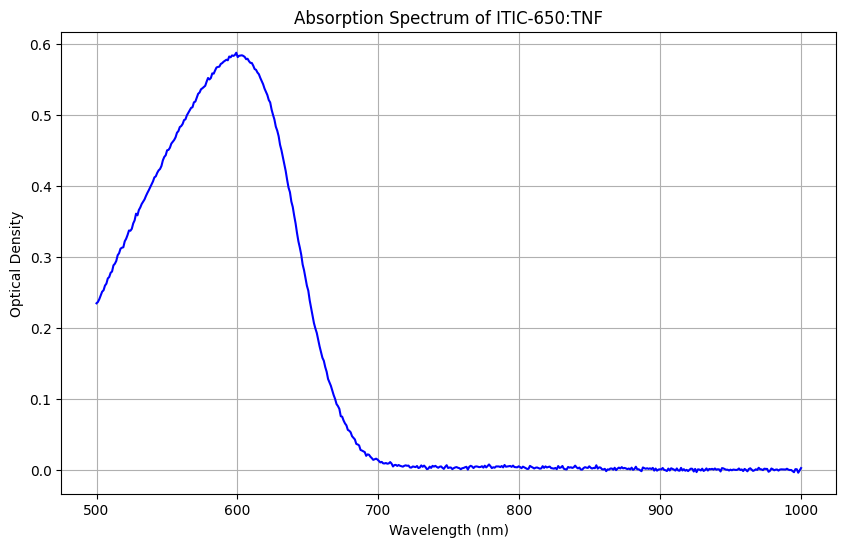

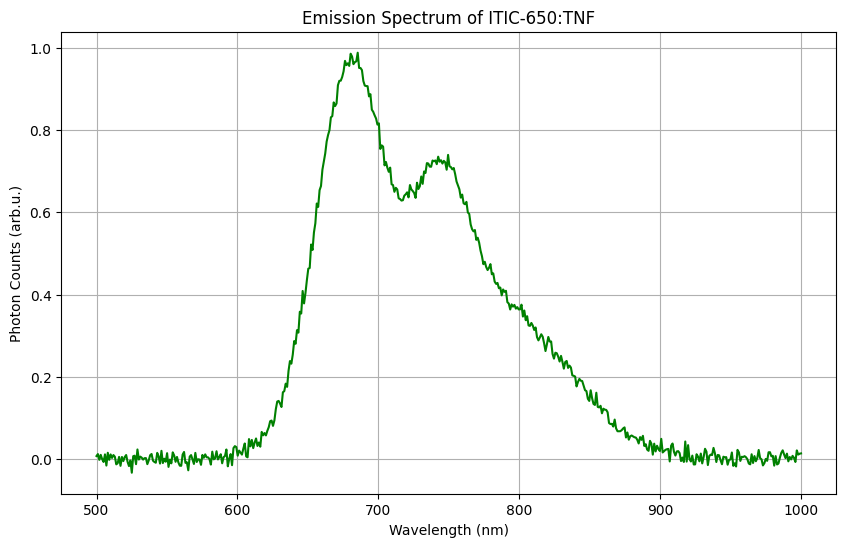

Fluorescence quantum yield of undoped ITIC-650: 30%
Fluorescence quantum yield of ITIC-650:TNF mixture: 1%
Phosphorescence observed in emission spectrum: False


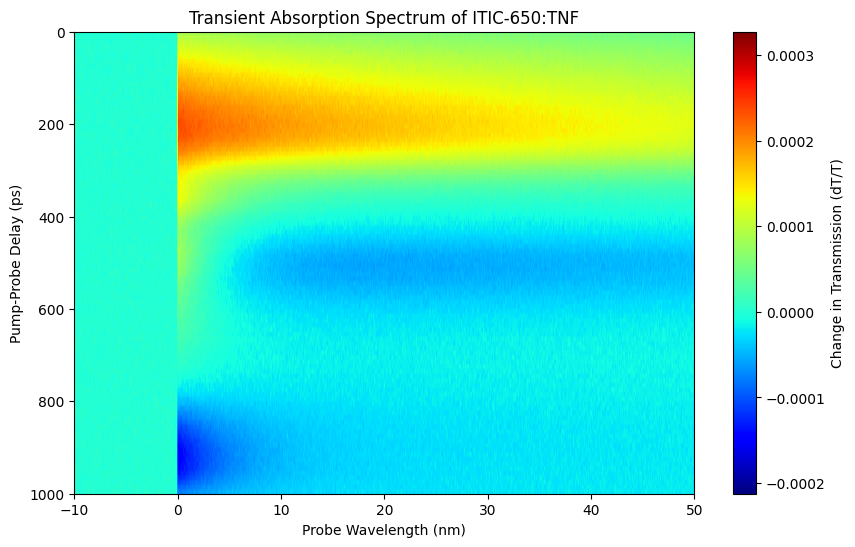

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Load absorption spectrum data
absorption_data = np.loadtxt('UV-Vis_absorption.dat')
wavelength_absorption = absorption_data[:, 0]  # Wavelength in nm
OD = absorption_data[:, 1]  # Optical density

# Load emission spectrum data
emission_data = np.loadtxt('PL-Emission.dat')
wavelength_emission = emission_data[:, 0]  # Wavelength in nm
photon_counts = emission_data[:, 1]  # Photon counts in arb.u.

# Load transient absorption spectrum data
transient_absorption_data = np.loadtxt('TA-2D_data.mx3')
pump_probe_delays = transient_absorption_data[:, 0]  # Pump-probe delay times in ps
probe_wavelengths = transient_absorption_data[0, 1:]  # Probe wavelengths in nm
change_in_transmission = transient_absorption_data[1:, 1:]  # Change in transmission dT/T

# Plot absorption spectrum
plt.figure(figsize=(10, 6))
plt.plot(wavelength_absorption, OD, color='blue')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Optical Density')
plt.title('Absorption Spectrum of ITIC-650:TNF')
plt.grid(True)
plt.show()

# Plot emission spectrum
plt.figure(figsize=(10, 6))
plt.plot(wavelength_emission, photon_counts, color='green')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Photon Counts (arb.u.)')
plt.title('Emission Spectrum of ITIC-650:TNF')
plt.grid(True)
plt.show()

# Analyze fluorescence yield
undoped_fluorescence_yield = 30  # Fluorescence quantum yield of undoped ITIC-650 (%)
prepared_fluorescence_yield = 1  # Fluorescence quantum yield of ITIC-650:TNF mixture (%)
print(f"Fluorescence quantum yield of undoped ITIC-650: {undoped_fluorescence_yield}%")
print(f"Fluorescence quantum yield of ITIC-650:TNF mixture: {prepared_fluorescence_yield}%")

# Check for phosphorescence
phosphorescence_observed = False  # Assuming no phosphorescence observed in emission spectrum
print("Phosphorescence observed in emission spectrum:", phosphorescence_observed)

# Analyze transient absorption spectrum
plt.figure(figsize=(10, 6))
plt.imshow(change_in_transmission, aspect='auto', extent=[probe_wavelengths[0], probe_wavelengths[-1], pump_probe_delays[-1], pump_probe_delays[0]], cmap='jet')
plt.colorbar(label='Change in Transmission (dT/T)')
plt.xlabel('Probe Wavelength (nm)')
plt.ylabel('Pump-Probe Delay (ps)')
plt.title('Transient Absorption Spectrum of ITIC-650:TNF')
plt.show()
